In [2]:
import torch
import matplotlib.pyplot as plt
from torch import nn

In [3]:
# initial definition 
weight = 0.7
bias = 0.3
# just some random values....

In [4]:
# setting up the ranges for the reandom dataset

start = 0
end= 1
step=0.02


In [5]:
# x values
x =torch.arange(start,end,step).unsqueeze(dim =1)
# y values (labels ) for x

y = weight * x + bias


In [6]:
x[:10],y[:10]
# 10 values from x and y


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [7]:
# splitting the data into train and test
train_split = int (0.8*len(x))
train_split
# selecting the 80% of the data 

40

In [8]:
# splitting into train and test
X_train , Y_train =x[:train_split],y[:train_split]
# X_train -> 40values of the x
# Y_train -> 40values of the y

X_test ,Y_test =x[train_split:],y[train_split:] 

In [9]:
X_test.shape,Y_train.shape

(torch.Size([10, 1]), torch.Size([40, 1]))

In [10]:
X_test,X_train

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]))

In [11]:
len(X_train),len(Y_train),len(X_test),len(Y_test)

(40, 40, 10, 10)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_59660\2774019439.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(prop={"size": 14});


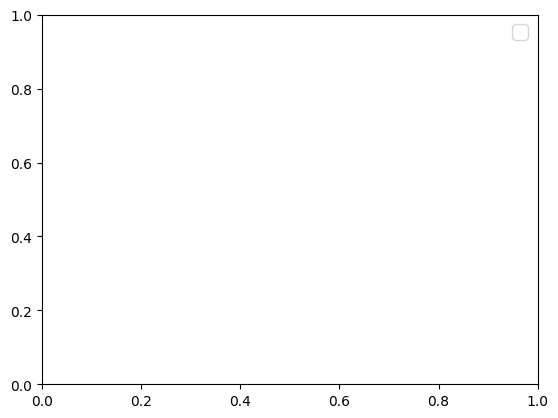

In [12]:
def plot_predictions(train_data=X_train,train_labels=Y_train,test_data=X_test,test_labels=Y_test,predictions=None):
    plt.figure(figsize=(10, 7))
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")
    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
plt.legend(prop={"size": 14});

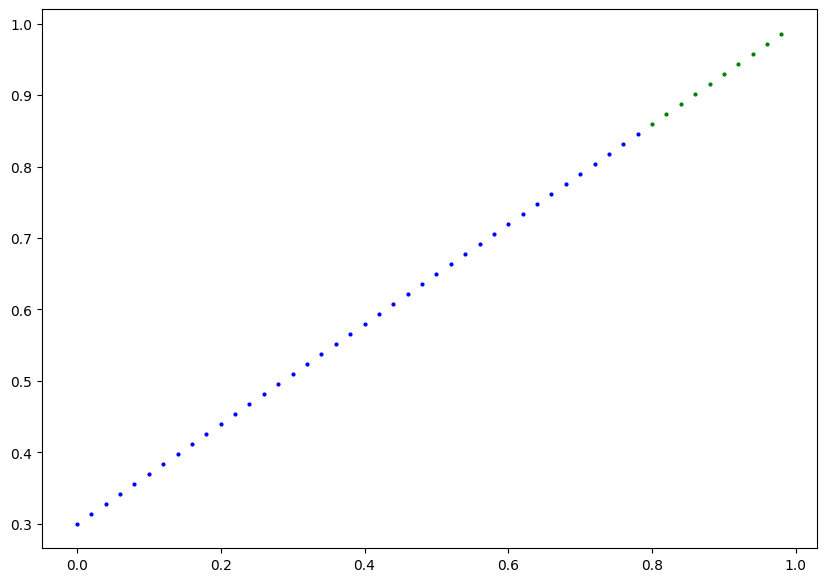

In [13]:
plot_predictions();

In [14]:
# now we will start building the model

In [15]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__() 
        self.weights = nn.Parameter(torch.randn(1,dtype=torch.float),requires_grad=True) 
        self.bias = nn.Parameter(torch.randn(1,dtype=torch.float),requires_grad=True) 
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias
    
    # here weight and bias will start with some rendom values of 1 dimension of type float

In [16]:
# seed is used to constrol the randomness of the weight and bias
torch.manual_seed(42)

# assinged the LinReg to model0
model_0=LinearRegressionModel()


# list all the parameters used in the model defined.
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [17]:
model_0.state_dict()
# made a dictionary of the parameters

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [18]:
with torch.inference_mode(): 
    y_preds = model_0(X_test)

In [19]:
# here in the above code all the values of the X_test goes to the function one by one the forward 
# funtion performs the operations and the new values are stored in the y_preds

In [20]:
print(f"Number of testing samples: {len(X_test)}") 
print(f"Number of predictions made: {len(y_preds)}")
print(f"Predicted values:\n{y_preds}")

Number of testing samples: 10
Number of predictions made: 10
Predicted values:
tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])


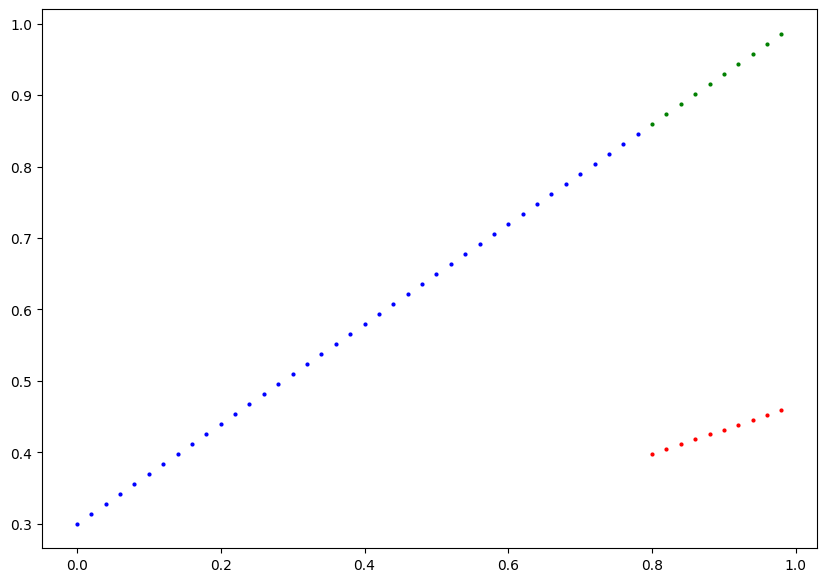

In [21]:
# now we will plot the prediction on the previous one
plot_predictions(predictions=y_preds)

In [22]:
# there is soo much loss here
# to see the loss at every place (values)

Y_test-y_preds

tensor([[0.4618],
        [0.4691],
        [0.4764],
        [0.4836],
        [0.4909],
        [0.4982],
        [0.5054],
        [0.5127],
        [0.5200],
        [0.5272]])

In [23]:
# as we can see the loss is too much here
# too decrease the loss we will now use loss fn and optimizers

In [24]:
loss_fn=nn.L1Loss()
# this is for mean absolute error

optimizer=torch.optim.SGD(params=model_0.parameters(),lr=0.001)
# we used stocastic gradient descent 
# parameters are weight and bias

In [25]:
# now we will biuld the training loop 

In [26]:
# dummy training


# epochs= 100
# number of times the loop will run


# creating some empty lists to track the values
# train_loss_values = []
# test_loss_values = []
# epoch_count = []





# for epoch in range(epochs):
#     model_0.train()
#     y_pred = model_0(X_train)
#     loss=loss_fn(y_pred,Y_train)
#     optimizer.zero_grad()
#     loss.backward()
#     optimizer.step()
#     model_0.eval()

    # the value of the loss (error)
    # print(f"loss {loss}")
    # for this values of weight and bias
    # print(list(model_0.parameters()))




# now we will try to make predictions
# with torch.inference_mode():
#     y_preds_new=model_0(X_test)
# we will try to make predicitons for the x text values from the trained model0





# plot_predictions(predictions=y_preds_new)
# the parameters are same except we sent the prediciton made by the model
# the new predicitons are slitly better then last

In [47]:
epochs=400

train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    model_0.train()
    y_pred=model_0(X_train)
    loss=loss_fn(y_pred,Y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()



    # for testing
    model_0.eval()
    with torch.inference_mode():
        test_pred=model_0(X_test)

    test_loss=loss_fn(test_pred,Y_test.type(torch.float))
    if epoch %10==0:
        epoch_count.append(epoch)
        train_loss_values.append(loss.detach().numpy())
        test_loss_values.append(test_loss.detach().numpy())
        print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

Epoch: 0 | MAE Train Loss: 0.007186878472566605 | MAE Test Loss: 0.01670604944229126 
Epoch: 10 | MAE Train Loss: 0.006843519397079945 | MAE Test Loss: 0.01594732329249382 
Epoch: 20 | MAE Train Loss: 0.006500349845737219 | MAE Test Loss: 0.015119964256882668 
Epoch: 30 | MAE Train Loss: 0.006156443618237972 | MAE Test Loss: 0.014292603358626366 
Epoch: 40 | MAE Train Loss: 0.005813261028379202 | MAE Test Loss: 0.013533895835280418 
Epoch: 50 | MAE Train Loss: 0.005469909869134426 | MAE Test Loss: 0.012706518173217773 
Epoch: 60 | MAE Train Loss: 0.0051260096952319145 | MAE Test Loss: 0.011879158206284046 
Epoch: 70 | MAE Train Loss: 0.004782737232744694 | MAE Test Loss: 0.011086148209869862 
Epoch: 80 | MAE Train Loss: 0.004439301788806915 | MAE Test Loss: 0.010327416472136974 
Epoch: 90 | MAE Train Loss: 0.004096207674592733 | MAE Test Loss: 0.0095000509172678 
Epoch: 100 | MAE Train Loss: 0.003752306802198291 | MAE Test Loss: 0.008672690019011497 
Epoch: 110 | MAE Train Loss: 0.0034

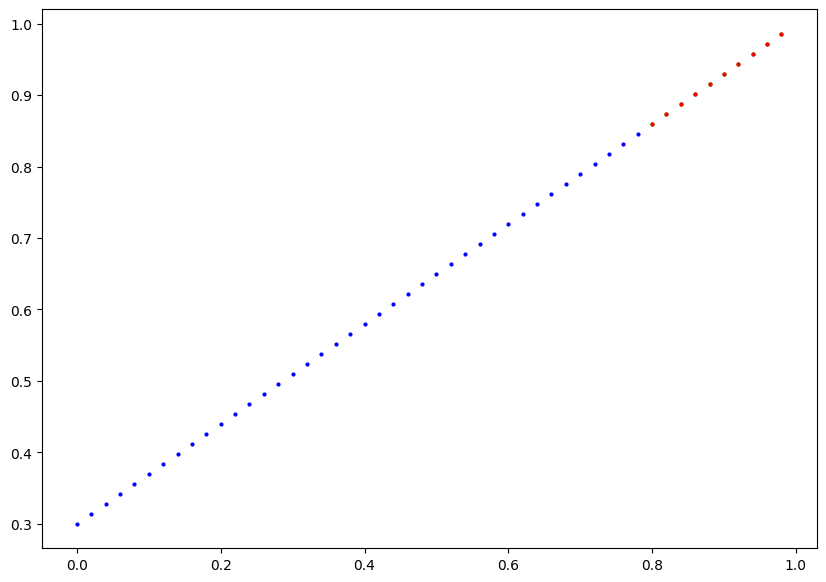

In [48]:
plot_predictions(predictions=test_pred)

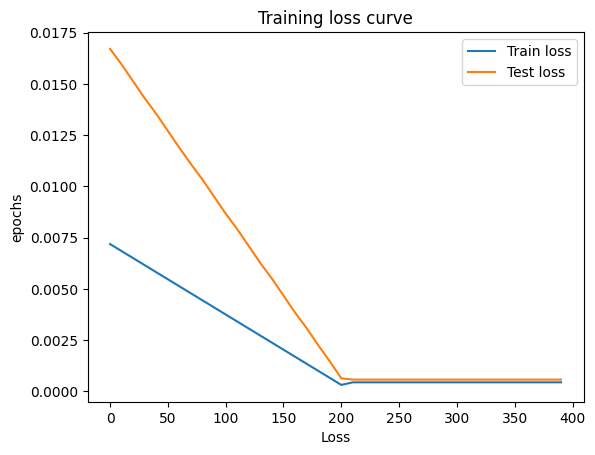

In [49]:
plt.plot(epoch_count,train_loss_values,label="Train loss")
plt.plot(epoch_count,test_loss_values,label="Test loss")
plt.title("Training loss curve")
plt.xlabel("Loss")
plt.ylabel("epochs")
plt.legend()

In [51]:
print("The model learned the following values for weights and bias:")
print(model_0.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('weights', tensor([0.6994])), ('bias', tensor([0.2998]))])

And the original values for weights and bias are:
weights: 0.7, bias: 0.3


In [53]:
# trying to make predictions
model_0.eval()
with torch.inference_mode():
    y_preds=model_0(X_test)
y_preds 

tensor([[0.8593],
        [0.8733],
        [0.8873],
        [0.9013],
        [0.9152],
        [0.9292],
        [0.9432],
        [0.9572],
        [0.9712],
        [0.9852]])

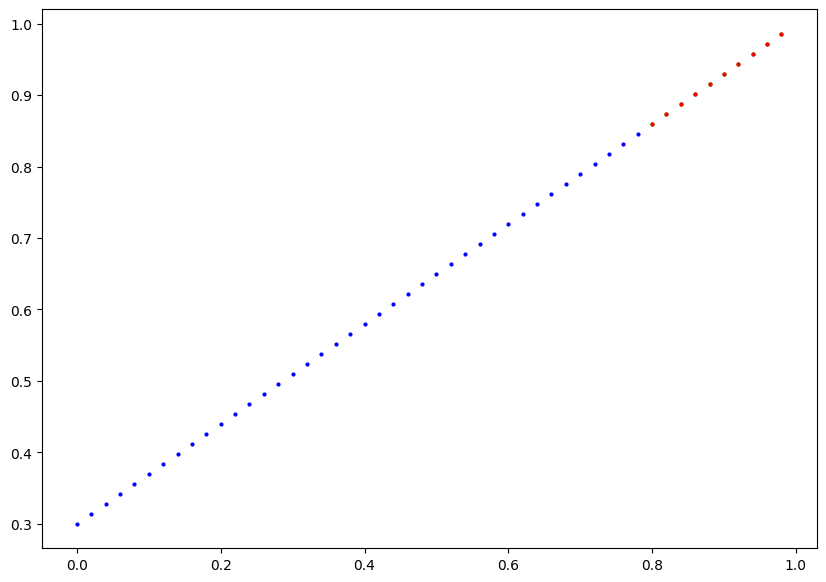

In [55]:
plot_predictions(predictions=y_preds)

In [56]:
# saving the model 
from pathlib import Path

MODEL_PATH = Path ("models")
MODEL_PATH.mkdir(parents=True,exist_ok=True)

MODEL_NAME = "First_Model.pth"
MODEL_SAVE_PATH=MODEL_PATH/MODEL_NAME

print(f"saving model to : {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)

saving model to : models\First_Model.pth
